<h1>Data Scientist - Capstone Project 2 - Healthcare</h1>
<hr>
Submitted by: Yanda Sebega <br>
Date: 18-Apr-2022 <br>
Module: Data Scientist Capstone Project <br>
Institution: Simplilearn Solutions <br>


<hr>
<h2> Import Libraries </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.metrics import accuracy
%matplotlib inline

<hr>
<h2> Import Data </h2>

In [2]:
df = pd.read_csv('healthcare_diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<hr>
<h2> Data Exploration </h2>

<h3> 1. Perform descriptive analysis </h3>

In [4]:
features_subset = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[features_subset].describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,62.0,72.0,80.00,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.0,23.0,32.00,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.0,30.5,127.25,846.0
BMI,768.0,31.992578,7.884160,0.0,27.3,32.0,36.60,67.1


The min of all the selected features are zeroes. Let's compute the counts of each of these variables.

In [5]:
df[df[features_subset]==0].count()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

As we can see there is big chunk of zeroes in SkinThickness and Insulin. There is also a fair amount of zeroes in BloodPressure.

The percentage of missing values:

- Glucose: 0.7%
- BloodPressure: 4.6%
- SkinThickness: 29.6%
- Insulin: 48.7%
- BMI: 1.4%

The literature indicate that a missingness under 4% can be removed safely. Hence, BloodPressure and BMI can be removed from the dataset without affecting the analysis.

As for BloodPressure, SkinThickness, and Insulin features, we need to device a strategy for data inputation.

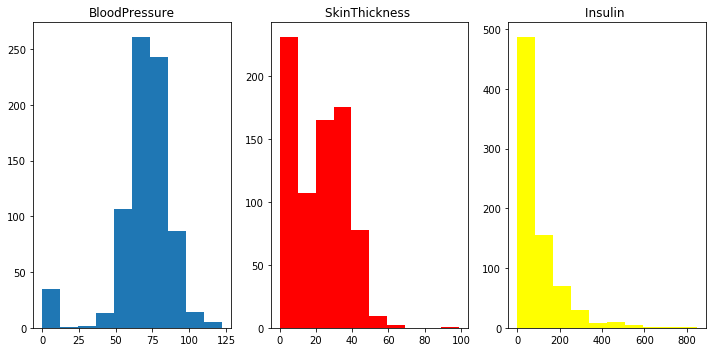

In [6]:
# Create instances of the subplots and set figure size to be readable.
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# Plot the histograms for 'SkinThickness', 'Insulin' features.
ax0.hist(df['BloodPressure'])
ax0.title.set_text('BloodPressure')

ax1.hist(df['SkinThickness'], color='red')
ax1.title.set_text('SkinThickness ')

ax2.hist(df['Insulin'], color='yellow')
ax2.title.set_text('Insulin ')

# Space the subplots
fig.tight_layout()

In [7]:
# Glucose, BloodPressure and BMI have very limited zeroes. These can be removed. 
df['Glucose'].replace(to_replace = 0, value = np.nan, inplace = True)
df['BMI'].replace(0, np.nan, inplace=True)
 
# We will replace missing BloodPressure and SkinThickness value with their respective mean as their histograms are ~bell-shaped
df['BloodPressure'].replace(0, df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].replace(0, df['SkinThickness'].mean(), inplace=True)
# As for the insulin, it is right-skewed. A median is more representative.
df['Insulin'].replace(0, df['Insulin'].median(), inplace=True)


In [8]:
df[df[features_subset]==0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [10]:
df.dropna(how='any', inplace=True)

In [11]:
# Save the dataset to a CSV file to be used in tableau later on.
df.to_csv('healthcare_diabetes_cleaned.csv')

<h3> 2. Visually explore these variables using histograms </h3>

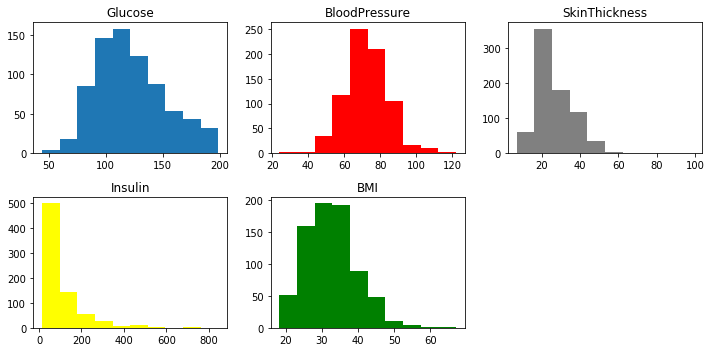

In [12]:
# Create instances of the subplots and set figure size to be readable.
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

# Plot the histograms for 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' features with headings of plots
ax0.hist(df['Glucose'])
ax0.title.set_text('Glucose')

ax1.hist(df['BloodPressure'], color='red')
ax1.title.set_text('BloodPressure')

ax2.hist(df['SkinThickness'], color='gray')
ax2.title.set_text('SkinThickness')

ax3.hist(df['Insulin'], color='yellow')
ax3.title.set_text('Insulin')

ax4.hist(df['BMI'], color='green')
ax4.title.set_text('BMI')

# Disable empty plot
ax5.set_visible(False)

# Space the subplots
fig.tight_layout()


<h3> 3. Create a count plot describing the data types and the count of variables </h3>

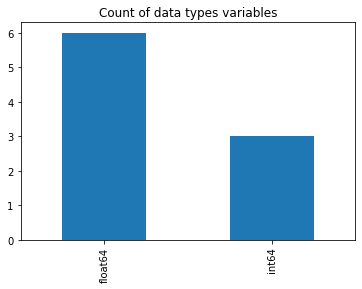

In [13]:
df.dtypes.value_counts().plot(kind='bar', title='Count of data types variables')

<h3> 4. Check the balance of data by plotting the count of outcomes by their value </h3>

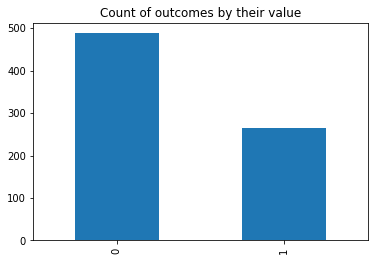

In [14]:
df['Outcome'].value_counts().plot(kind='bar', title='Count of outcomes by their value')

We see that the negative outcome is double the positive outcome (diabetes)

<h3> 5. Create scatter charts between the pair of variables </h3>

In [15]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0


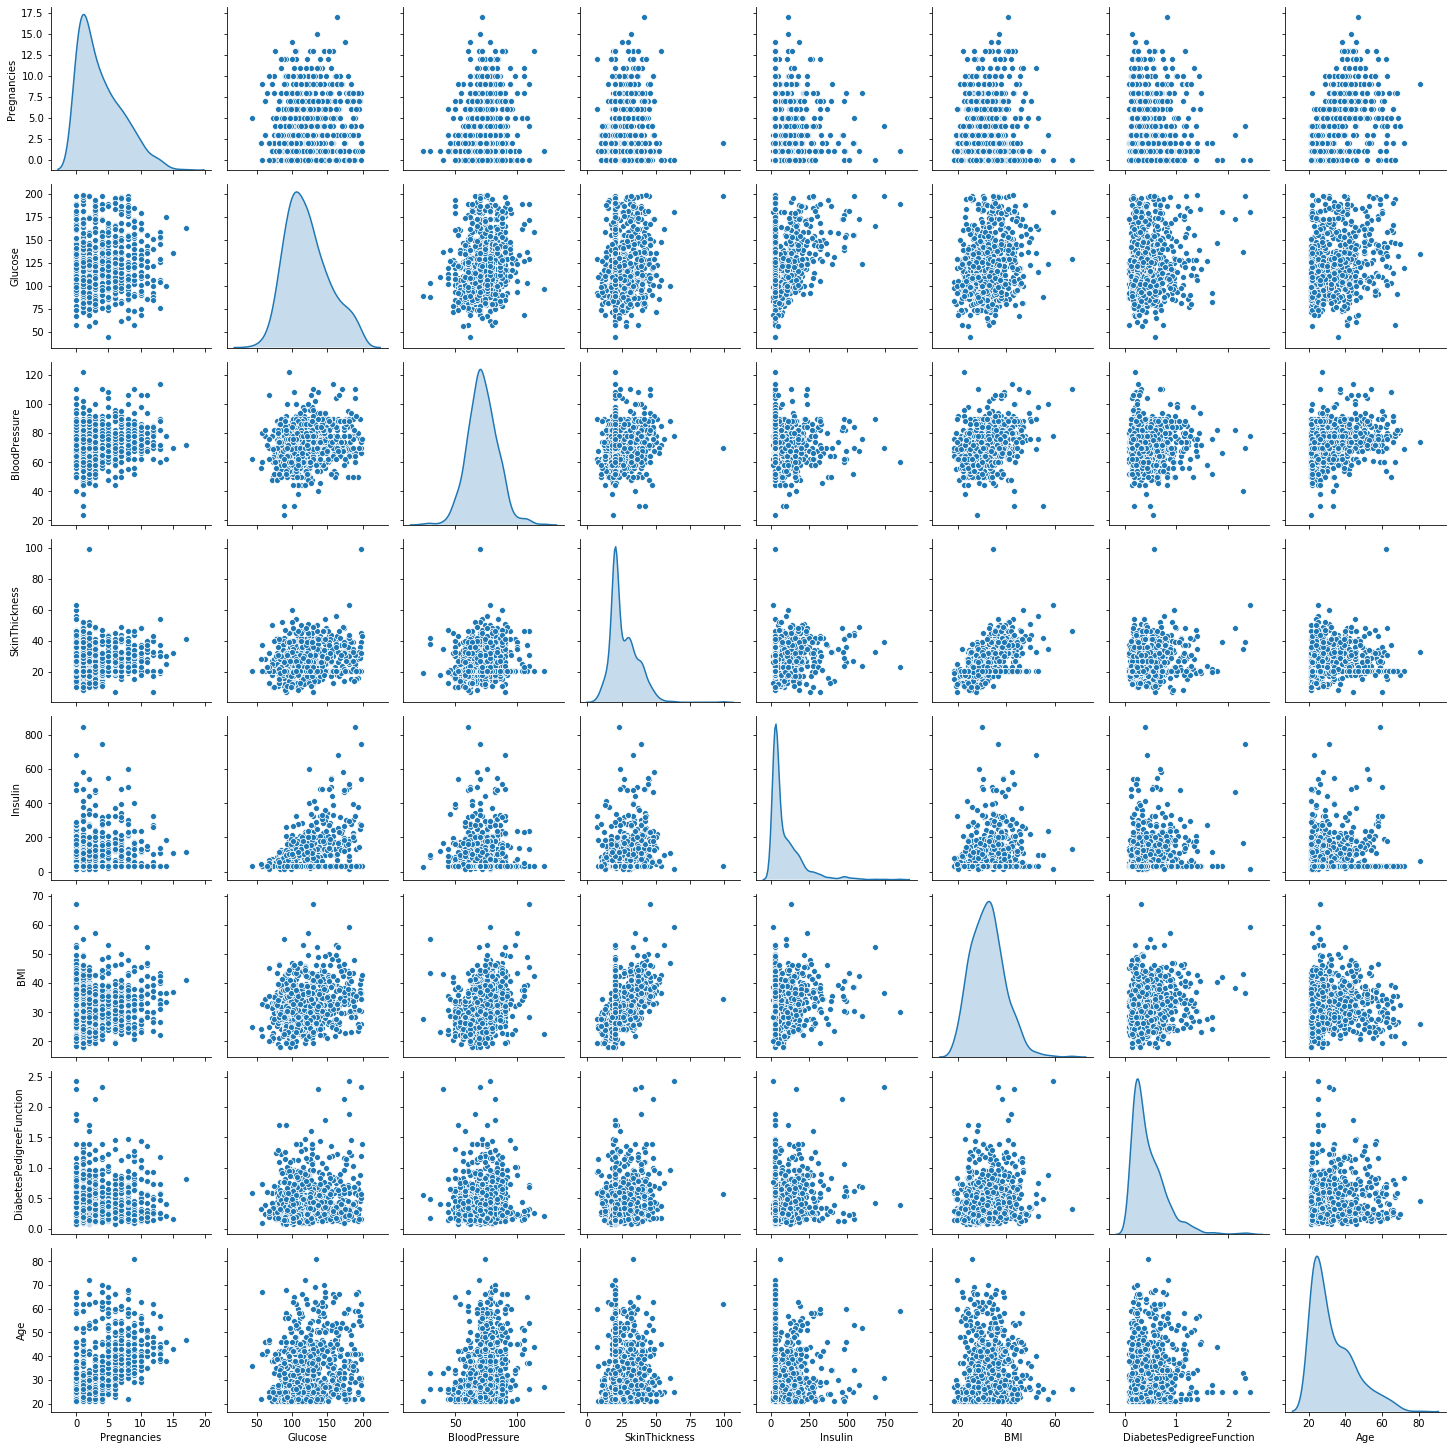

In [16]:
# Select all columns but outcome and plot...
sns.pairplot(df.iloc[:, :-1], diag_kind='kde')

Age plays an important factor in this pair plot analysis. We tend to develop diabetes as we grow older. 
There is high concentration of positive outcome between 30 and 50. BMI and age are also correlated. There is linear trend between BMI and SkinThickness.

<h3> 6. Perform correlation analysis </h3>

In [17]:
df.iloc[:, :-1].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.125717,0.205855,0.012426,-0.056748,0.018352,-0.029159,0.545238
Glucose,0.125717,1.000000,0.219401,0.157489,0.355118,0.232771,0.133945,0.261490
BloodPressure,0.205855,0.219401,1.000000,0.135266,-0.022939,0.280468,0.001282,0.320740
SkinThickness,0.012426,0.157489,0.135266,1.000000,0.272996,0.535150,0.153184,0.023182
Insulin,-0.056748,0.355118,-0.022939,0.272996,1.000000,0.189913,0.176223,-0.018806
BMI,0.018352,0.232771,0.280468,0.535150,0.189913,1.000000,0.153683,0.022144
DiabetesPedigreeFunction,-0.029159,0.133945,0.001282,0.153184,0.176223,0.153683,1.000000,0.031674
Age,0.545238,0.261490,0.320740,0.023182,-0.018806,0.022144,0.031674,1.000000


[Text(0.5, 1, 'Correlation Analysis')]

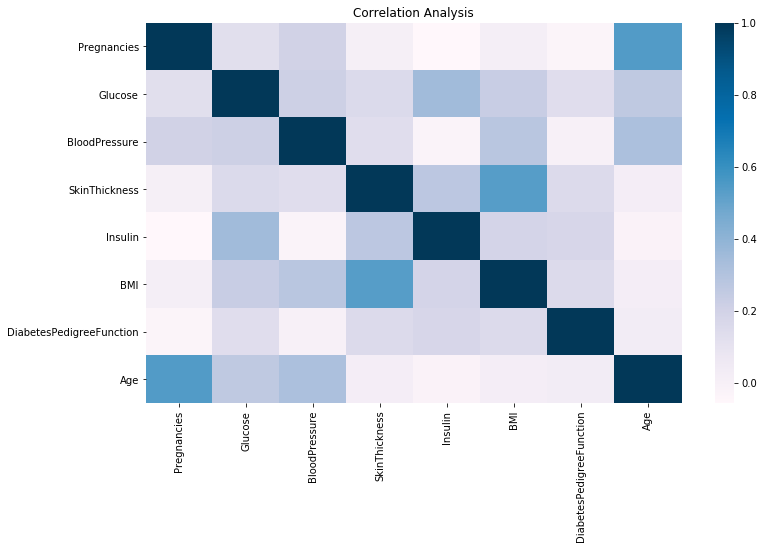

In [18]:
plt.figure(figsize=(12,7))
sns.heatmap(df.iloc[:, :-1].corr(), cmap='PuBu').set(title='Correlation Analysis')

<hr>
<h2> Data Modelling </h2>

<h3> 1. Device strategies for model building </h3>

This is a binary classification problem. 

We encounter a plethora of algorithms for binary classification problems. 

We name: 

- Logistic Regression
- K-Nearest Neighbors (KNN)
- Artificial Neural Networks (ANN)
- Random Forest
- Decision Tree (DT)
- Support Vector Machines (SVM)

In this project, we will use KNN, SVM, Logistic regression and ANN. 

Prior to using any of the algorithms mentioned above, the dataset will be split into train and test set with test-size of 30%.

The train set will be used to train the model and the test to test the accuracy of our model. 

That is the strategy we will be using to tackle this problem.

In [19]:
# Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['Outcome'], test_size=.3)

<h3> 2. Apply an appropriate classification algorithm to build a model </h3>

We will compute 4 differents classification algorithms. They are: logistic regression, Support Vector Machines, Random Forest and Artificial Neural Networks.

<b>Logistic Regression</b>

In [20]:
lr = LogisticRegression()

In [21]:
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [22]:
y_pred_lr = lr.predict(X_test)

In [23]:
lr_score = accuracy_score(y_test, y_pred_lr)

In [24]:
print(lr_score)

0.7566371681415929


<b>SVM</b>

In [25]:
svm = SVC()

In [26]:
svm.fit(X_train, y_train)

SVC()

In [27]:
y_pred_svm = svm.predict(X_test)

In [28]:
svm_score = accuracy_score(y_test, y_pred_svm)

In [29]:
print(svm_score)

0.7389380530973452


<b>Random Forest</b>

In [30]:
rfc = RandomForestClassifier()

In [31]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred_rf = rfc.predict(X_test)

In [33]:
rfc_score = accuracy_score(y_test, y_pred_rf)

In [34]:
print(rfc_score)

0.7699115044247787


<b>Neural Network</b>

In [35]:
# Create the network structure
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [38]:
y_pred_ann = model.predict(X_test)

In [39]:
ann_score = model.evaluate(X_test, y_pred_ann)

8/8 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.0000e+00


<h3> 3. Compare various models with the results from KNN algorithm </h3>

In [40]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred_knn = knn.predict(X_test)

In [43]:
knn_score = accuracy_score(y_test, y_pred_knn)

In [44]:
print(knn_score)

0.6858407079646017


In [45]:
# Comparison
score_table = {'Logistic Regression Score': lr_score, 'SVM Score': svm_score, 'Random Forest Score': rfc_score, 
 'Neural Network Score': ann_score, 'KNN Score': knn_score}

In [46]:
print(score_table)

{'Logistic Regression Score': 0.7566371681415929, 'SVM Score': 0.7389380530973452, 'Random Forest Score': 0.7699115044247787, 'Neural Network Score': [0.4844074845314026, 0.0], 'KNN Score': 0.6858407079646017}


Random Forest algorithm seems to perform as we have a score of 0.79 which is the highest of all the score. The second choice is the logistic regression algorithm.

<h3> 4. Create a classification report by analyzing sensitivity, specificity, AC(ROC curve) </h3>

In [47]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.80      0.76       137
           1       0.62      0.51      0.56        89

    accuracy                           0.69       226
   macro avg       0.67      0.65      0.66       226
weighted avg       0.68      0.69      0.68       226



In [48]:
result = confusion_matrix(y_test, y_pred_knn)
result

array([[110,  27],
       [ 44,  45]], dtype=int64)

In [49]:
# Sensitivity
result[0, 0]/float(result[0, 0] + result[0,1])

0.8029197080291971

In [50]:
# Specificity
result[1,1]/float(result[1, 1] + result[0,1])

0.625

In [51]:
# AC (ROC Curve)
roc_auc_score(y_test, y_pred_knn)

0.6542688427786435

The Classification report above is used to measure the quality of predictions from a classification algorithm. 

The Precision columns show the percentage of correct predictions (58%). The fraction of positives that were correctly identified is represented by the Recall columns (39%). 

The F1 score is a weighted harmonic mean of precision and recall. That is the F1 score. That is 46%. 

The AC or ROC score was computed using the roc_auc_score class from sklearn. it is 0.61.

<hr>
<h2> Data Reporting </h2>

<h3> 5. Create a dashboard in tableau </h3>

The dashboard was create using Tableau Desktop Pro (trial version). It encompasses Pie chart, Scatter charts, Histogram, Heatmap and Bins of these age values 20-25, 25-30, 30-35...etc


<b>Dashboard</b>
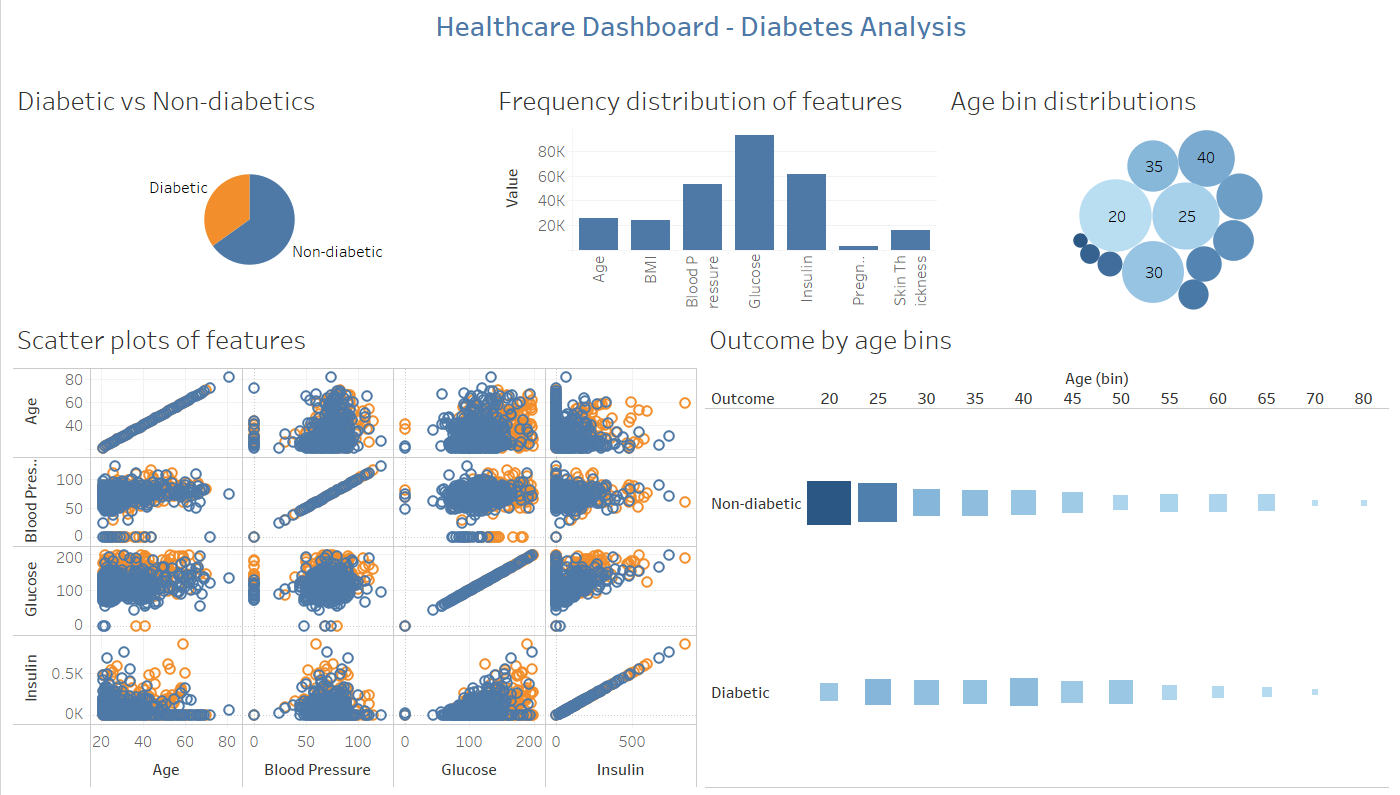
